In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn as skt

- Após agrupar as bases relacionadas a Docentes de 2013 a 2019, criei o dataset único abaixo:

In [ ]:
path = '/content/drive/My Drive/bases_capesppg_docentes/capesppg_docentes_2013-2019.csv'
df = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


- Visualizando os dados do dataset:

In [ ]:
df.head()

,AN_BASE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,NM_GRAU_PROGRAMA,NM_MODALIDADE_PROGRAMA,CD_CONCEITO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,CS_STATUS_JURIDICO,SG_UF_PROGRAMA,NM_REGIAO,ID_PESSOA,TP_SEXO_DOCENTE,AN_NASCIMENTO_DOCENTE,DS_FAIXA_ETARIA,NM_PAIS_NACIONALIDADE_DOCENTE,DS_TIPO_VINCULO_DOCENTE_IES,DS_REGIME_TRABALHO,CD_CAT_BOLSA_PRODUTIVIDADE,IN_DOUTOR,AN_TITULACAO,NM_GRAU_TITULACAO,SG_IES_TITULACAO,NM_IES_TITULACAO,NM_PAIS_IES_TITULACAO,DS_CLIENTELA_QUADRIENAL_2017
0,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,832956,FEMININO,1975,35 A 39 ANOS,BRASIL,COLABORADOR,PARCIAL,NaN,S,2008.0,DOUTORADO,PARIS 7,UNIVERSITÉ PARIS DIDEROT - PARIS VII,FRANÇA,AVALIAÇÃO
1,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,34738,MASCULINO,1978,35 A 39 ANOS,BRASIL,COLABORADOR,PARCIAL,NaN,S,2008.0,DOUTORADO,USP/RP,UNIVERSIDADE DE SÃO PAULO/ RIBEIRÃO PRETO,BRASIL,AVALIAÇÃO
2,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,729344,MASCULINO,1954,55 A 59 ANOS,BRASIL,COLABORADOR,PARCIAL,NaN,S,2008.0,DOUTORADO,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,BRASIL,AVALIAÇÃO
3,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,526496,FEMININO,1966,45 A 49 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,NaN,S,1999.0,DOUTORADO,USP/RP,UNIVERSIDADE DE SÃO PAULO/ RIBEIRÃO PRETO,BRASIL,AVALIAÇÃO
4,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,10229,MASCULINO,1928,70 OU MAIS,BRASIL,APOSENTADO,PARCIAL,NaN,S,1960.0,DOUTORADO,USP,UNIVERSIDADE DE SÃO PAULO,BRASIL,AVALIAÇÃO


- Demonstrando de forma visual que há dados dos anos 2013 à 2019 neste dataset:

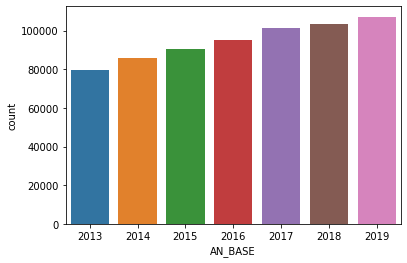

In [ ]:
sns.countplot(x='AN_BASE', data = df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662665 entries, 0 to 662664
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AN_BASE                        662665 non-null  int64  
 1   CD_AREA_AVALIACAO              662665 non-null  int64  
 2   NM_AREA_AVALIACAO              662665 non-null  object 
 3   NM_GRANDE_AREA_CONHECIMENTO    662665 non-null  object 
 4   NM_AREA_CONHECIMENTO           662665 non-null  object 
 5   CD_PROGRAMA_IES                662665 non-null  object 
 6   NM_PROGRAMA_IES                662665 non-null  object 
 7   NM_GRAU_PROGRAMA               662665 non-null  object 
 8   NM_MODALIDADE_PROGRAMA         662665 non-null  object 
 9   CD_CONCEITO_PROGRAMA           662665 non-null  object 
 10  SG_ENTIDADE_ENSINO             662665 non-null  object 
 11  NM_ENTIDADE_ENSINO             662665 non-null  object 
 12  CS_STATUS_JURIDICO            

- Agrupando os dados por Programa de Pós Graduação

In [ ]:
grouped = df.groupby('CD_PROGRAMA_IES',as_index=False)
grouped.first()

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,NM_PROGRAMA_IES,NM_GRAU_PROGRAMA,NM_MODALIDADE_PROGRAMA,CD_CONCEITO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,CS_STATUS_JURIDICO,SG_UF_PROGRAMA,NM_REGIAO,ID_PESSOA,TP_SEXO_DOCENTE,AN_NASCIMENTO_DOCENTE,DS_FAIXA_ETARIA,NM_PAIS_NACIONALIDADE_DOCENTE,DS_TIPO_VINCULO_DOCENTE_IES,DS_REGIME_TRABALHO,CD_CAT_BOLSA_PRODUTIVIDADE,IN_DOUTOR,AN_TITULACAO,NM_GRAU_TITULACAO,SG_IES_TITULACAO,NM_IES_TITULACAO,NM_PAIS_IES_TITULACAO,DS_CLIENTELA_QUADRIENAL_2017
0,10001018002P1,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,832956,FEMININO,1975,35 A 39 ANOS,BRASIL,COLABORADOR,PARCIAL,2,S,2008.0,DOUTORADO,PARIS 7,UNIVERSITÉ PARIS DIDEROT - PARIS VII,FRANÇA,AVALIAÇÃO
1,10001018004P4,2013,45,INTERDISCIPLINAR,MULTIDISCIPLINAR,MEIO AMBIENTE E AGRÁRIAS,DESENVOLVIMENTO REGIONAL E MEIO AMBIENTE,MESTRADO/DOUTORADO,ACADÊMICO,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,10222,MASCULINO,1954,55 A 59 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,2,S,1998.0,DOUTORADO,UNESP/RC,UNIVERSIDADE EST.PAULISTA JÚLIO DE MESQUITA FI...,BRASIL,AVALIAÇÃO
2,10001018005P0,2013,36,GEOGRAFIA,CIÊNCIAS HUMANAS,GEOGRAFIA,GEOGRAFIA,MESTRADO/DOUTORADO,ACADÊMICO,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,9039,FEMININO,1964,45 A 49 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,1A,S,2004.0,DOUTORADO,UFPA,UNIVERSIDADE FEDERAL DO PARÁ,BRASIL,AVALIAÇÃO
3,10001018006P7,2013,27,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",CIÊNCIAS SOCIAIS APLICADAS,ADMINISTRAÇÃO,ADMINISTRAÇÃO,MESTRADO,ACADÊMICO,4,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,775921,MASCULINO,1954,55 A 59 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,1D,S,2010.0,DOUTORADO,UAA,UNIVERSIDAD AUTÓNOMA DE ASUNCIÓN,PARAGUAI,AVALIAÇÃO
4,10001018008P0,2013,41,LETRAS / LINGUÍSTICA,"LINGÜÍSTICA, LETRAS E ARTES",LINGÜÍSTICA,CIÊNCIAS DA LINGUAGEM,MESTRADO,ACADÊMICO,2,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,490149,FEMININO,1963,50 A 54 ANOS,BRASIL,CLT,DEDICAÇÃO EXCLUSIVA,None,S,2001.0,DOUTORADO,UNICAMP,UNIVERSIDADE ESTADUAL DE CAMPINAS,BRASIL,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718,53037014001P0,2013,39,CIÊNCIA POLÍTICA E RELAÇÕES INTERNACIONAIS,CIÊNCIAS HUMANAS,CIÊNCIA POLÍTICA,PODER LEGISLATIVO,MESTRADO PROFISSIONAL,PROFISSIONAL,3,CEFOR,"CENTRO DE FORMAÇÃO, TREINAMENTO E APERFEIÇOAMENTO",FEDERAL,DF,CENTRO-OESTE,120356,MASCULINO,1979,30 A 34 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,None,S,2006.0,DOUTORADO,UNB,UNIVERSIDADE DE BRASÍLIA,BRASIL,AVALIAÇÃO
4719,53044002001P7,2015,22,SAÚDE COLETIVA,CIÊNCIAS DA SAÚDE,SAÚDE COLETIVA,POLÍTICAS PÚBLICAS EM SAÚDE,MESTRADO PROFISSIONAL,PROFISSIONAL,3,EGS/FIOCRUZ BRASÍLIA,ESCOLA DE GOVERNO EM SAÚDE/DIRETORIA REGIONAL ...,FEDERAL,DF,CENTRO-OESTE,116242,MASCULINO,1976,35 A 39 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,2,S,2015.0,DOUTORADO,UNB,UNIVERSIDADE DE BRASÍLIA,BRASIL,AVALIAÇÃO
4720,53045009001P3,2014,27,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",CIÊNCIAS SOCIAIS APLICADAS,ADMINISTRAÇÃO PÚBLICA,ADMINISTRAÇÃO PÚBLICA EM REDE NACIONAL,MESTRADO PROFISSIONAL,PROFISSIONAL,3,UFCG,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE,FEDERAL,PB,NORDESTE,105227,MASCULINO,1977,35 A 39 ANOS,BRASIL,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,2,S,2014.0,DOUTORADO,UFCG,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE,BRASIL,AVALIAÇÃO
4721,53062000001P8,2019,39,CIÊNCIA POLÍTICA E RELAÇÕES INTERNACIONAIS,CIÊNCIAS HUMANAS,CIÊNCIA POLÍTICA,POLÍTICAS PÚBLICAS E GOVERNO,MESTRADO,ACADÊMICO,A,FGV/BSB,FUNDACAO GETULIO VARGAS ( BRASÍLIA ),PARTICULAR,DF,CENTRO-OESTE,22058,MASCULINO,1951,65 A 69 ANOS,BRASIL,COLABORADOR,PARCIAL,1B,S,1981.0,DOUTORADO,NI,PRINCETON UNIVERSITY,ESTADOS UNIDOS,None


- Erro ao analisar os conceitos dos programas:

As visualizações e agrupamento utilizando os conceitos dos programas apresentou erro em diversar situações. Vide exemplos abaixo:

In [ ]:
df.groupby('AN_BASE').mean()['CD_CONCEITO_PROGRAMA']


KeyError: ignored

In [ ]:
df.groupby('NM_PAIS_IES_TITULACAO').mean()['CD_CONCEITO_PROGRAMA'].round(2).sort_values(ascending=False).head(15)

KeyError: ignored

Analisando os dados únicos da coluna Conceito, notei que o erro é devido a alguns conceitos estarem no formato string:

In [ ]:
df['CD_CONCEITO_PROGRAMA'].unique()

array([3, 4, 2, 5, 6, 7, 1, '5', '4', '3', '2', '6', '7', '1', 'A'],
      dtype=object)

Abaixo notamos que o conceito 'A' é um problema das bases dos anos 2018 e 2019. 

In [ ]:
# alguns conceitos de programa são A - dropar todos os 'A'

df.query("CD_CONCEITO_PROGRAMA=='A'").groupby(['CD_PROGRAMA_IES','CD_CONCEITO_PROGRAMA', 'AN_BASE'], as_index=False).first()

,CD_PROGRAMA_IES,CD_CONCEITO_PROGRAMA,AN_BASE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,NM_PROGRAMA_IES,NM_GRAU_PROGRAMA,NM_MODALIDADE_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,CS_STATUS_JURIDICO,SG_UF_PROGRAMA,NM_REGIAO,ID_PESSOA,TP_SEXO_DOCENTE,AN_NASCIMENTO_DOCENTE,DS_FAIXA_ETARIA,NM_PAIS_NACIONALIDADE_DOCENTE,DS_TIPO_VINCULO_DOCENTE_IES,DS_REGIME_TRABALHO,CD_CAT_BOLSA_PRODUTIVIDADE,IN_DOUTOR,AN_TITULACAO,NM_GRAU_TITULACAO,SG_IES_TITULACAO,NM_IES_TITULACAO,NM_PAIS_IES_TITULACAO,DS_CLIENTELA_QUADRIENAL_2017
0,10001018041P7,A,2019,7,BIODIVERSIDADE,CIÊNCIAS BIOLÓGICAS,ECOLOGIA,CONSERVAÇÃO E USO DE RECURSOS NATURAIS,MESTRADO,ACADÊMICO,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,522353,MASCULINO,1976,40 A 44 ANOS,BRASIL,SERVIDOR PÚBLICO,PARCIAL,2,S,2004.0,DOUTORADO,UNB,UNIVERSIDADE DE BRASÍLIA,BRASIL,None
1,10001018042P3,A,2019,46,ENSINO,MULTIDISCIPLINAR,ENSINO,EDUCAÇÃO MATEMÁTICA,MESTRADO,ACADÊMICO,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,397502,MASCULINO,1980,35 A 39 ANOS,BRASIL,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,None,S,2014.0,DOUTORADO,UFMT,UNIVERSIDADE FEDERAL DE MATO GROSSO,BRASIL,None
2,10001018043P0,A,2019,33,FILOSOFIA,CIÊNCIAS HUMANAS,FILOSOFIA,FILOSOFIA,MESTRADO,ACADÊMICO,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,66620,MASCULINO,1984,35 A 39 ANOS,BRASIL,COLABORADOR,PARCIAL,None,S,2012.0,DOUTORADO,PUC/RS,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO GRANDE...,BRASIL,None
3,11001011072P2,A,2019,2,CIÊNCIA DA COMPUTAÇÃO,CIÊNCIAS EXATAS E DA TERRA,CIÊNCIA DA COMPUTAÇÃO,CIÊNCIA DA COMPUTAÇÃO,MESTRADO,ACADÊMICO,UFAC,UNIVERSIDADE FEDERAL DO ACRE,FEDERAL,AC,NORTE,353622,MASCULINO,1974,45 A 49 ANOS,BRASIL,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,None,S,2017.0,DOUTORADO,USP/ESALQ,USP ( ESCOLA SUPERIOR DE AGRICULTURA LUIZ DE Q...,BRASIL,None
4,11001011073P9,A,2019,46,ENSINO,MULTIDISCIPLINAR,ENSINO,ENSINO DE HUMANIDADES E LINGUAGENS,MESTRADO,ACADÊMICO,UFAC,UNIVERSIDADE FEDERAL DO ACRE,FEDERAL,AC,NORTE,536654,MASCULINO,1962,55 A 59 ANOS,BRASIL,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,None,S,2001.0,DOUTORADO,UNESP-SJRP,UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUI...,BRASIL,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,53003012013P7,A,2019,28,ECONOMIA,CIÊNCIAS SOCIAIS APLICADAS,ECONOMIA,POLÍTICAS PÚBLICAS,MESTRADO PROFISSIONAL,PROFISSIONAL,UCB,UNIVERSIDADE CATÓLICA DE BRASÍLIA,PARTICULAR,DF,CENTRO-OESTE,124506,MASCULINO,1982,35 A 39 ANOS,BRASIL,CLT,PARCIAL,2,S,2010.0,DOUTORADO,UFRGS,UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL,BRASIL,None
255,53019016003P1,A,2019,28,ECONOMIA,CIÊNCIAS SOCIAIS APLICADAS,ECONOMIA,ECONOMIA DO SETOR PÚBLICO,MESTRADO PROFISSIONAL,PROFISSIONAL,IDP,INSTITUTO BRASILIENSE DE DIREITO PÚBLICO,PARTICULAR,DF,CENTRO-OESTE,340015,MASCULINO,1987,30 A 34 ANOS,BRASIL,CLT,PARCIAL,None,N,2013.0,MESTRADO,FGV/SP,FUNDAÇÃO GETÚLIO VARGAS (SP),BRASIL,None
256,53019016004P8,A,2019,26,DIREITO,CIÊNCIAS SOCIAIS APLICADAS,DIREITO,DIREITO ECONÔMICO E DESENVOLVIMENTO,MESTRADO PROFISSIONAL,PROFISSIONAL,IDP,INSTITUTO BRASILIENSE DE DIREITO PÚBLICO,PARTICULAR,DF,CENTRO-OESTE,995387,MASCULINO,1978,40 A 44 ANOS,BRASIL,CLT,INTEGRAL,None,S,2013.0,DOUTORADO,UFMG,UNIVERSIDADE FEDERAL DE MINAS GERAIS,BRASIL,None
257,53062000001P8,A,2019,39,CIÊNCIA POLÍTICA E RELAÇÕES INTERNACIONAIS,CIÊNCIAS HUMANAS,CIÊNCIA POLÍTICA,POLÍTICAS PÚBLICAS E GOVERNO,MESTRADO,ACADÊMICO,FGV/BSB,FUNDACAO GETULIO VARGAS ( BRASÍLIA ),PARTICULAR,DF,CENTRO-OESTE,22058,MASCULINO,1951,65 A 69 ANOS,BRASIL,COLABORADOR,PARCIAL,1B,S,1981.0,DOUTORADO,NI,PRINCETON UNIVERSITY,ESTADOS UNIDOS,None


In [ ]:
df1 = df.query("CD_CONCEITO_PROGRAMA=='A'").groupby(['CD_PROGRAMA_IES','CD_CONCEITO_PROGRAMA', 'AN_BASE'], as_index=False).first()
df1['AN_BASE'].unique()

array([2019, 2018])

Testei pesquisando na base de dados 'Programa 2018' na tentativa de encontrar o conceito numérico - sem sucesso (também apresentava o conceito 'A'):

In [ ]:
df.query("CD_CONCEITO_PROGRAMA=='A' and AN_BASE==2018").groupby(['CD_PROGRAMA_IES','CD_CONCEITO_PROGRAMA', 'AN_BASE'], as_index=False).first()

,CD_PROGRAMA_IES,CD_CONCEITO_PROGRAMA,AN_BASE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,NM_PROGRAMA_IES,NM_GRAU_PROGRAMA,NM_MODALIDADE_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,CS_STATUS_JURIDICO,SG_UF_PROGRAMA,NM_REGIAO,ID_PESSOA,TP_SEXO_DOCENTE,AN_NASCIMENTO_DOCENTE,DS_FAIXA_ETARIA,NM_PAIS_NACIONALIDADE_DOCENTE,DS_TIPO_VINCULO_DOCENTE_IES,DS_REGIME_TRABALHO,CD_CAT_BOLSA_PRODUTIVIDADE,IN_DOUTOR,AN_TITULACAO,NM_GRAU_TITULACAO,SG_IES_TITULACAO,NM_IES_TITULACAO,NM_PAIS_IES_TITULACAO,DS_CLIENTELA_QUADRIENAL_2017
0,33011010014P0,A,2018,39,CIÊNCIA POLÍTICA E RELAÇÕES INTERNACIONAIS,CIÊNCIAS HUMANAS,CIÊNCIA POLÍTICA,SEGURANÇA DE AVIAÇÃO E AERONAVEGABILIDADE CONT...,MESTRADO PROFISSIONAL,PROFISSIONAL,ITA,INSTITUTO TECNOLÓGICO DE AERONÁUTICA,FEDERAL,SP,SUDESTE,973449,MASCULINO,1970,45 A 49 ANOS,BRASIL,COLABORADOR,PARCIAL,2,S,2009.0,DOUTORADO,ITA,INSTITUTO TECNOLÓGICO DE AERONÁUTICA,BRASIL,None
1,42002010164P1,A,2018,49,CIÊNCIAS AMBIENTAIS,MULTIDISCIPLINAR,CIÊNCIAS AMBIENTAIS,CIÊNCIA E TECNOLOGIA AMBIENTAL,MESTRADO,ACADÊMICO,UFSM,UNIVERSIDADE FEDERAL DE SANTA MARIA,FEDERAL,RS,SUL,473387,MASCULINO,1981,35 A 39 ANOS,BRASIL,SERVIDOR PÚBLICO,DEDICAÇÃO EXCLUSIVA,None,S,2011.0,DOUTORADO,INPE,INSTITUTO NACIONAL DE PESQUISAS ESPACIAIS,BRASIL,None


In [ ]:
# Comprovamos que, após o groupby por cd_programa_ies, temos valores únicos de PPG
# O próximo passo é utilizar o aggregate e transformar algumas colunas em dados categoricos

x = df['CD_PROGRAMA_IES'].unique().tolist()
len(x)

4723